In [1]:
%load_ext autoreload
%autoreload 2

import pyscisci.all as pyscisci

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
try:
    import seaborn as sns
    sns.set_style('white')
except:
    pass

%matplotlib inline

In [2]:
# set this path to where the APS database will be stored
path2pubmed = '/home/ajgates/PubMed'
path2pubmed = '/Volumes/GatesExpansionDrive/DataSets/PubMed/PubMed2021'

In [3]:
mypubmed = pyscisci.PubMed(path2pubmed, keep_in_memory=False) 

# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one DataFrame in memory at a time

# otherwise keep_in_memory=True will keep each DataFrame in memory after its loaded

In [4]:
# This function will download the latest baseline version of PubMed.
# Depending on your internet connection, it could take several hours to complete the download.

mypubmed.download_from_source(rewrite_existing=False)
# if your connetion breaks/download stops for any reason, set rewrite_existing = False and 
# rerun to continue downloading where you left off

In [ ]:
# before we can start running our analysis, we have to preprocess the raw data into
# DataFrames that are more convinent to work with
mypubmed.preprocess(show_progress=True)


Starting to preprocess the PubMed database.


In [ ]:
# PubMed creates three dataframes:
# pub_df - keeps all of the publication information
# columns : ['PublicationId', 'Title', 'Year', 'Month', 'Day', 'Doi', 'JournalId', 'ISSN', 'Volume', 'Issue', 'Pages', 'TeamSize']

# paa_df - links the publications to authors and affiliations 
# NOTE: PubMed does not disambiguate authors!!!
# columns : ['PublicationId', 'FirstName', 'LastName', 'FullName', 'Affiliations', 'AuthorSequence']

# pub2field_df - links the publications to fields (aka subjectAreas)
# columns : ['PublicationId', 'FieldId']

# pub2ref_df - keeps the citation information
# columns : ['CitingPublicationId', 'CitedPublicationId']


ERROR! Session/line number was not unique in database. History logging moved to new session 344


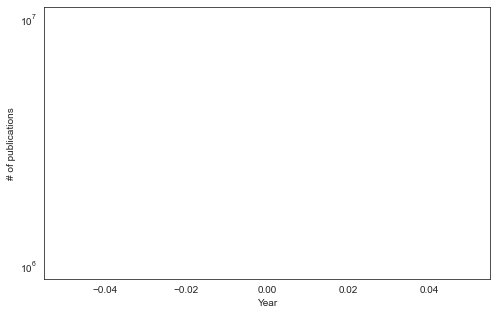

In [5]:
# lets plot the number of publications each year
yearly_articles = pyscisci.groupby_count(df=mypubmed.pub_df, colgroupby='Year', colcountby='PublicationId', count_unique=True,
                               show_progress=True)
yearly_articles.sort_values(by='Year', inplace=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'],yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

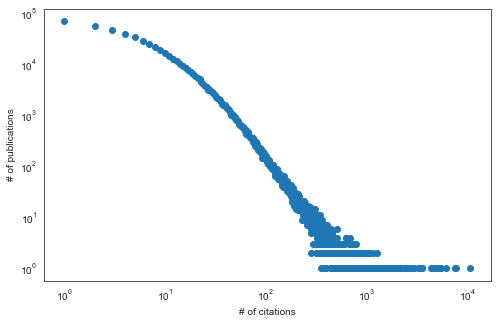

In [7]:
# now we can see the distribution of citation counts 
citations = pyscisci.groupby_count(df=myaps.pub2ref_df, colgroupby='CitedPublicationId', colcountby='CitingPublicationId', 
                          count_unique=True, show_progress=True)

citevalues, citecounts = np.unique(citations['CitingPublicationIdCount'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(citevalues, citecounts)

ax.set_xlabel('# of citations')
ax.set_ylabel("# of publications")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()